# linear regreesion（线性回归）
注意：python版本为3.6，
安装TensorFlow的方法：pip install tensorflow / conda install tensorflow

In [4]:
import pandas as pd
import seaborn as sns
sns.set(context='notebook',style='whitegrid',palette='dark')
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [7]:
df = pd.read_csv('ex1data1.txt',names = ['population','profile'])
df.head()

,population,profile
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profile       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


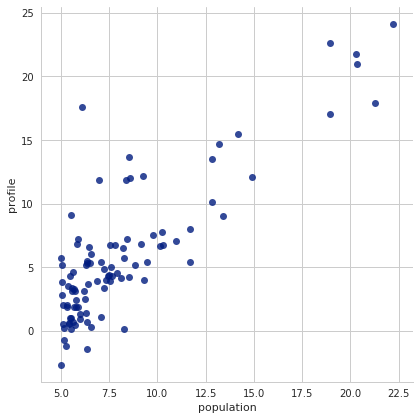

In [14]:
# fit_reg : bool, optional  If True, estimate and plot a regression model relating the x and y variables.
sns.lmplot('population','profile',df,size=6,fit_reg=False)
plt.show()

In [19]:
def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones':np.ones(len(df))}) #ones是m行1列的dataframe
    data = pd.concat([ones,df],axis=1) # 合并数据，根据列合并
    return data.iloc[:,:-1].as_matrix() # 这个操作返回 ndarray,不是矩阵

def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列

def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放


In [22]:
get_X(df)[:4]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032]])

In [26]:
df.describe()

,population,profile
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [24]:
df[:4]

,population,profile
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540


In [23]:
get_y(df)[:4]

array([ 17.592 ,   9.1302,  13.662 ,  11.854 ])

多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。


In [17]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.train.GradientDescentOptimizer):# 这个函数是旧金山的一个大神Lucas Shen写的
      # placeholder for graph input
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)
    
#     construct the graph
    with tf.variable_scope('linear-regression'):
        w = tf.get_variable('weights',
                           (X_data.shape[1],1),
                           initializer=tf.constant_initializer()) #n*1
        y_pred = tf.matmul(X,w)

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)
    
#     run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []
        
        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break
#     clear the graph
    tf.reset_default_graph()
    return {'loss':loss_data,'parameters':W_val}  # just want to return in row vector format

In [27]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据，并赋予列名

data.head()#看下数据前5行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [30]:
X = get_X(data)
X.shape

(97, 2)

In [33]:
y = get_y(data)
y.shape

(97,)

In [34]:
theta = np.zeros(X.shape[1])#X.shape[1]=2,代表特征数n

In [35]:
theta

array([ 0.,  0.])